# <font color='blue'> Project 1 - Regression
#### Group Members:
#### Femina Martin Pereira - FXP190002
#### Divya Deepak Pai - DXP190009
    
### Dataset Source:
The data set contains data on used cars (Toyota Corolla) on sale during the late summer of 2004 in the Netherlands. The data set is from the book Data Mining in Excel by 2005 Galit Shmueli, Nitin R. Patel, Peter C. Bruce.(https://www3.nd.edu/~busiforc/problems/DataMining/ToyotaCorolla.xls).
It has 1421 records containing details on 38 attributes including Price, Age, Kilometers, Horsepower, and other specifications 
    
### Dataset Description:    
A large Toyota car dealer offers purchasers of a new Toyota cars the option to buy from them their used car. In particular, a new promotion promises to pay high prices for used Toyota Corolla cars for purchasers of a new car. The dealer then sells the used cars with a small profit. In order to
ensure a reasonable profit, the dealer needs to be able to predict the price that they will get for the used cars. For that reason they collected data on all previous sales of used Toyota Corolla’s at their dealership. The data include the sales price and information on the car such as its age, mileage, fuel
type, engine size, etc (Data Mining in Excel, 2005, pg.57)

### Goal:
The regression goal is to predict various factors which has been chosen initially that really affect the price of the Toyota Corolla model. 
    
### 1) Attributes Information:

#### I) Feature Set
##### Toyota Corolla Car Atrributes:-
- Id Record_ID
- Model Model Description
-Age_08_04 Age in months as in August 2004
-Mfg_Month	Manufacturing month
-Mfg_Year	Manufacturing Year
-KM	Accumulated Kilometers on odometer
-Fuel_Type	Fuel Type (Petrol, Diesel, CNG)
-HP	Horse Power
-Met_Color	Metallic Color?  (Yes=1, No=0)
-Color	Color (Blue, Red, Grey, Silver, Black, etc.)
-Automatic	Automatic ( (Yes=1, No=0)
-CC	Cylinder Volume in cubic centimeters
-Doors	Number of doors
-Cylinders	Number of cylinders
-Gears	Number of gear positions
-Quarterly_Tax	Quarterly road tax in EUROs
-Weight	Weight in Kilograms
-Mfr_Guarantee	Within Manufacturer's Guarantee period  (Yes=1, No=0)
-BOVAG_Guarantee	BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
-Guarantee_Period	Guarantee period in months
-ABS	Anti-Lock Brake System (Yes=1, No=0)
-Airbag_1	Driver_Airbag  (Yes=1, No=0)
-Airbag_2	Passenger Airbag  (Yes=1, No=0)
-Airco	Airconditioning  (Yes=1, No=0)
-Automatic_airco	Automatic Airconditioning  (Yes=1, No=0)
-Boardcomputer	Boardcomputer  (Yes=1, No=0)
-CD_Player	CD Player  (Yes=1, No=0)
-Central_Lock	Central Lock  (Yes=1, No=0)
-Powered_Windows	Powered Windows  (Yes=1, No=0)
-Power_Steering	Power Steering  (Yes=1, No=0)
-Radio	Radio  (Yes=1, No=0)
-Mistlamps	Mistlamps  (Yes=1, No=0)
-Sport_Model	Sport Model  (Yes=1, No=0)
-Backseat_Divider	Backseat Divider  (Yes=1, No=0)
-Metallic_Rim	Metallic Rim  (Yes=1, No=0)
-Radio_cassette	Radio Cassette  (Yes=1, No=0)
-Parking_Assistant	Parking assistance system  (Yes=1, No=0)
-Tow_Bar	Tow Bar  (Yes=1, No=0)
   
#### II) Target Value
- Price	Offer Price in EUROs


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 2) Importing the Original Dataset with no missing values

In [2]:
df = pd.read_csv('ToyotaCorolla.csv', encoding='latin1')

In [3]:
main = df
main

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,October,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,October,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,September,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,July,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,March,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,December,1998,20544,Petrol,86,1,...,1,1,0,1,1,1,0,0,0,0
1421,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,September,1998,19000,Petrol,86,0,...,0,1,0,0,1,1,0,0,0,0
1422,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,October,1998,17016,Petrol,86,0,...,0,1,0,0,0,1,0,0,0,0
1423,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,November,1998,16916,Petrol,86,1,...,0,0,0,0,0,1,0,0,0,0


### 3) Splitting the Main Dataset to X - Features and Y - Target
##### We are first splitting the datasets to X and Y because we want to introduce NaN values only to the feature dataset

In [7]:
# Y - Target Dataset
Y = main['Price']
Y

#X - Feature Dataset
X = main
X.drop(columns = ['Price'], axis =1, inplace=True)
X

,Id,Model,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,23,October,2002,46986,Diesel,90,1,Blue,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,23,October,2002,72937,Diesel,90,1,Silver,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,24,September,2002,41711,Diesel,90,1,Blue,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,26,July,2002,48000,Diesel,90,0,Black,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,30,March,2002,38500,Diesel,90,0,Black,...,1,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,69,December,1998,20544,Petrol,86,1,Blue,...,1,1,0,1,1,1,0,0,0,0
1421,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,72,September,1998,19000,Petrol,86,0,Grey,...,0,1,0,0,1,1,0,0,0,0
1422,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,71,October,1998,17016,Petrol,86,0,Blue,...,0,1,0,0,0,1,0,0,0,0
1423,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,70,November,1998,16916,Petrol,86,1,Grey,...,0,0,0,0,0,1,0,0,0,0


### 4) Since the dataset is complete, we randomly insert 5-10% NaN values. 
#### Replace about 5 percent of the feature data with NaN values using np.random.random

In [8]:
X = X.mask(np.random.random(X.shape) < .05)

### 5) Test what percentage of data is missing
#### Below the code shows that only 95% of Data is available and the rest 5% is NaN values as we intended it to be

In [9]:
val = 0
for col in X.columns:
    val += X[col].count()

print(val / X.size )

0.9493998153277932


In [10]:
X

,Id,Model,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1.0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,NaN,October,2002.0,46986.0,Diesel,90.0,1.0,Blue,...,1.0,1.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,NaN
1,2.0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,23.0,October,2002.0,72937.0,Diesel,90.0,1.0,Silver,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3.0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,24.0,September,2002.0,41711.0,Diesel,90.0,1.0,Blue,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
3,4.0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,26.0,July,2002.0,48000.0,Diesel,90.0,0.0,Black,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5.0,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,30.0,March,2002.0,38500.0,NaN,90.0,0.0,Black,...,1.0,1.0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,1438.0,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,69.0,December,1998.0,20544.0,Petrol,86.0,1.0,NaN,...,1.0,1.0,0.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0
1421,1439.0,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,72.0,September,1998.0,19000.0,Petrol,NaN,0.0,Grey,...,0.0,1.0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,0.0
1422,1440.0,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,71.0,October,1998.0,17016.0,Petrol,86.0,0.0,Blue,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1423,1441.0,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,70.0,November,1998.0,16916.0,Petrol,86.0,1.0,Grey,...,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0


### 6) Performing Train and Test Splits

In [11]:
from sklearn.model_selection import train_test_split

#Split for the Feature Dataset X
train_X, test_X = train_test_split(X, random_state = 0)

#Split for the Target Dataset Y
train_Y, test_Y = train_test_split(Y, random_state = 0)

In [12]:
train_X

,Id,Model,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
1297,1313.0,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,76.0,NaN,1998.0,70039.0,Petrol,110.0,1.0,Grey,...,0.0,1.0,0.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0
338,343.0,TOYOTA Corolla Liftback 1.6 VVTI 4/5-Doors,41.0,April,2001.0,29716.0,Petrol,116.0,1.0,Grey,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
649,656.0,TOYOTA Corolla 1.6 G6-R 2/3-Doors,63.0,June,1999.0,115000.0,CNG,110.0,0.0,Red,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1366,1382.0,TOYOTA Corolla 1.3 16V SEDAN LINEA TERRA 4/5-D...,80.0,January,1998.0,57000.0,Petrol,86.0,0.0,Blue,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
918,927.0,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,67.0,February,1999.0,57000.0,Petrol,110.0,0.0,Grey,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,772.0,TOYOTA Corolla 2.0 D Linea luna Wagon Stationw...,59.0,October,1999.0,78750.0,Diesel,90.0,1.0,Silver,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
835,844.0,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA AUT3...,68.0,January,1999.0,66785.0,Petrol,86.0,NaN,Blue,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1216,1232.0,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,74.0,July,1998.0,84123.0,Petrol,110.0,0.0,Black,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
559,566.0,TOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-...,47.0,October,2000.0,38900.0,Petrol,97.0,1.0,Grey,...,0.0,1.0,0.0,NaN,0.0,1.0,NaN,0.0,0.0,0.0


In [13]:
train_Y

1297     7500
338     11900
649      9450
1366     7750
918      8250
        ...  
763     10950
835     10400
1216     7950
559      8950
684      9450
Name: Price, Length: 1068, dtype: int64

In [11]:
test_X

,Id,Model,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
740,748.0,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,65.0,April,1999.0,82000.0,Petrol,86.0,1.0,Blue,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
644,651.0,TOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-...,68.0,January,1999.0,117000.0,Diesel,72.0,0.0,Silver,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
434,440.0,TOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-...,48.0,September,2000.0,78600.0,Petrol,110.0,1.0,Blue,...,1.0,1.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0
858,867.0,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,60.0,September,1999.0,64383.0,Petrol,86.0,0.0,Red,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0
141,143.0,TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 4/5-D...,19.0,February,2003.0,21684.0,Petrol,192.0,1.0,Silver,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,422.0,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3...,55.0,February,NaN,94122.0,Petrol,86.0,1.0,Blue,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
283,286.0,TOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-D...,41.0,April,2001.0,NaN,Petrol,110.0,1.0,Red,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1254,NaN,TOYOTA Corolla 1.3 Linea Terra wagon Stationwagen,78.0,March,1998.0,75323.0,Petrol,86.0,1.0,Red,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0
1125,NaN,TOYOTA Corolla 1.6 16V HATCHB S 2/3-Doors,72.0,September,1998.0,106108.0,Petrol,110.0,1.0,Blue,...,1.0,1.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0


In [14]:
test_Y

740      7450
644      6950
434      9750
858      8200
141     23950
        ...  
416      8950
283     11950
1254     8450
1125     7750
412      9950
Name: Price, Length: 357, dtype: int64

### 7) Exploratory Analysis on Train and Test Data
#### First we explore the Train and Test Data to see if we can drop insignificant columns and if imputations are required.

In [15]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1068 entries, 1297 to 684
Data columns (total 38 columns):
Id                   1007 non-null float64
Model                1004 non-null object
Age_08_04            994 non-null float64
Mfg_Month            1026 non-null object
Mfg_Year             1030 non-null float64
KM                   1019 non-null float64
Fuel_Type            1024 non-null object
HP                   1001 non-null float64
Met_Color            1010 non-null float64
Color                1012 non-null object
Automatic            1015 non-null float64
CC                   1021 non-null float64
Doors                1006 non-null float64
Cylinders            1015 non-null float64
Gears                994 non-null float64
Quarterly_Tax        1016 non-null float64
Weight               1016 non-null float64
Mfr_Guarantee        1014 non-null float64
BOVAG_Guarantee      1021 non-null float64
Guarantee_Period     1017 non-null float64
ABS                  996 non-null flo

### 8) Dropping Insignificant Columns from the Feature Dataset
#### The Id and Model Name are the ones which are insignificant so first we work on the Train_X and drop these columns

In [16]:
train_X.drop(columns = ['Id','Model'], axis = 1, inplace = True)
train_X

,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
1297,76.0,NaN,1998.0,70039.0,Petrol,110.0,1.0,Grey,0.0,NaN,...,0.0,1.0,0.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0
338,41.0,April,2001.0,29716.0,Petrol,116.0,1.0,Grey,0.0,1600.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
649,63.0,June,1999.0,115000.0,CNG,110.0,0.0,Red,0.0,1600.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1366,80.0,January,1998.0,57000.0,Petrol,86.0,0.0,Blue,0.0,1300.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
918,67.0,February,1999.0,57000.0,Petrol,110.0,0.0,Grey,0.0,1600.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,59.0,October,1999.0,78750.0,Diesel,90.0,1.0,Silver,0.0,1975.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
835,68.0,January,1999.0,66785.0,Petrol,86.0,NaN,Blue,NaN,1300.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1216,74.0,July,1998.0,84123.0,Petrol,110.0,0.0,Black,0.0,1600.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
559,47.0,October,2000.0,38900.0,Petrol,97.0,1.0,Grey,0.0,1400.0,...,0.0,1.0,0.0,NaN,0.0,1.0,NaN,0.0,0.0,0.0


#### Similarly we drop the Id and Model Name from the Test_X as well.

In [17]:
test_X.drop(columns = ['Id','Model'], axis = 1, inplace = True)
test_X

,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
740,65.0,April,1999.0,82000.0,Petrol,86.0,1.0,Blue,0.0,1300.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0,1.0
644,68.0,January,1999.0,117000.0,Diesel,72.0,0.0,Silver,0.0,2000.0,...,0.0,1.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0
434,48.0,September,2000.0,78600.0,Petrol,110.0,1.0,Blue,0.0,1600.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
858,60.0,September,1999.0,64383.0,Petrol,86.0,0.0,Red,0.0,1300.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
141,19.0,February,2003.0,21684.0,Petrol,192.0,1.0,Silver,0.0,1800.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,55.0,February,2000.0,94122.0,Petrol,86.0,1.0,NaN,0.0,1300.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
283,41.0,April,2001.0,45287.0,Petrol,110.0,1.0,Red,0.0,1600.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1.0
1254,78.0,March,1998.0,75323.0,Petrol,86.0,1.0,NaN,0.0,1300.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1125,72.0,September,1998.0,106108.0,Petrol,110.0,1.0,Blue,0.0,1600.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


### 9) List of columns that have missing values in Test and Train

In [18]:
train_X.isnull().any()

Age_08_04            True
Mfg_Month            True
Mfg_Year             True
KM                   True
Fuel_Type            True
HP                   True
Met_Color            True
Color                True
Automatic            True
CC                   True
Doors                True
Cylinders            True
Gears                True
Quarterly_Tax        True
Weight               True
Mfr_Guarantee        True
BOVAG_Guarantee      True
Guarantee_Period     True
ABS                  True
Airbag_1             True
Airbag_2             True
Airco                True
Automatic_airco      True
Boardcomputer        True
CD_Player            True
Central_Lock         True
Powered_Windows      True
Power_Steering       True
Radio                True
Mistlamps            True
Sport_Model          True
Backseat_Divider     True
Metallic_Rim         True
Radio_cassette       True
Parking_Assistant    True
Tow_Bar              True
dtype: bool

In [19]:
test_X.isnull().any()

Age_08_04            True
Mfg_Month            True
Mfg_Year             True
KM                   True
Fuel_Type            True
HP                   True
Met_Color            True
Color                True
Automatic            True
CC                   True
Doors                True
Cylinders            True
Gears                True
Quarterly_Tax        True
Weight               True
Mfr_Guarantee        True
BOVAG_Guarantee      True
Guarantee_Period     True
ABS                  True
Airbag_1             True
Airbag_2             True
Airco                True
Automatic_airco      True
Boardcomputer        True
CD_Player            True
Central_Lock         True
Powered_Windows      True
Power_Steering       True
Radio                True
Mistlamps            True
Sport_Model          True
Backseat_Divider     True
Metallic_Rim         True
Radio_cassette       True
Parking_Assistant    True
Tow_Bar              True
dtype: bool

### 10) Exploring the Feature Dataset
Let us explore some of the features that will be used in our machine learning algorithms. This will give us a better idea about the distribution of features as well as how to handle imputation of missing values in order to clean the data. We will plot the histograms for continous features and a bar graph for discrete/binary features separately which will help us understand better these features.


#### a) Plotting Histograms for Continous Features.
Here Age, KM (Kilometers), HP (Horse Power), CC, Quarterly Tax, Weight and Guarantee Period are Continous Features.

Text(0.5, 1.0, 'Guarantee Period Histogram')

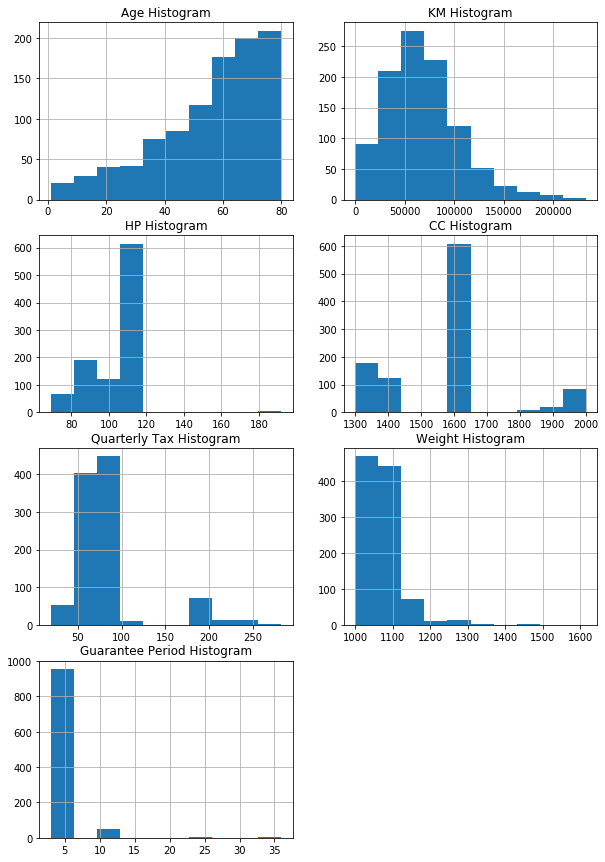

In [20]:
# Set up a grid of plots
plt.figure(figsize=(10,15)) 
fig_dims = (4, 2)

# Plot age histogram
plt.subplot2grid(fig_dims, (0,0))
train_X['Age_08_04'].hist()
plt.title('Age Histogram')

# Plot KM histogram
plt.subplot2grid(fig_dims, (0,1))
train_X['KM'].hist()
plt.title('KM Histogram')

# Plot HP histogram
plt.subplot2grid(fig_dims, (1,0))
train_X['HP'].hist()
plt.title('HP Histogram')

# Plot CC histogram
plt.subplot2grid(fig_dims, (1,1))
train_X['CC'].hist()
plt.title('CC Histogram')

# Plot Quarterly Tax histogram
plt.subplot2grid(fig_dims, (2,0))
train_X['Quarterly_Tax'].hist()
plt.title('Quarterly Tax Histogram')

# Plot Weight histogram
plt.subplot2grid(fig_dims, (2,1))
train_X['Weight'].hist()
plt.title('Weight Histogram')

# Plot Weight histogram
plt.subplot2grid(fig_dims, (3,0))
train_X['Guarantee_Period'].hist()
plt.title('Guarantee Period Histogram')

#### b) Analysis and Understanding of the Dataset For Continous Variables:
We can clearly see above the following trends for each of these variables:
    
1. **Age**: The histogram for Age is left skewed. The solution would be to perform median imputation for missing values.
2. **KM**: The histogram for KM its slightly right skewed. The solution would be to perform median imputation for missing values.
3. **HP**: has a few outliers at the higher extremes while majority of its values lies in range 5 to 120. The histogram for HP its slightly right skewed. The solution would be to perform median imputation.
4. **CC**: CC has sparce data with continuity from 1300-1400+, majority values at 1600 and very few at the higher end from 1800 - 2000 with values around 160000 as well. CC is right skewed because of extreme values and hence median imputation is needed.
5. **Quarterly Tax**: Shows its highest frequency from 50-100 with the rest values showing sparceness. Since the distribution is right skewed we will perform median imputation for the missing values.
6. **Weight**: Clearly shows increased frequency for values form 1000-1200 and very few in the higher values. Since the distribution is right skewed, we will perform median imputation for the missing values.
7. **Guarantee Period**: The Guarantee Period plot clearly shows the data is right skewed and requires median imputation for the missing values.

#### c) Plotting Bar Graphs for Discrete/Binary Features.
Here the rest of the catagorical variables and binary valued variables are plotted with Bar Graph for better understanding.

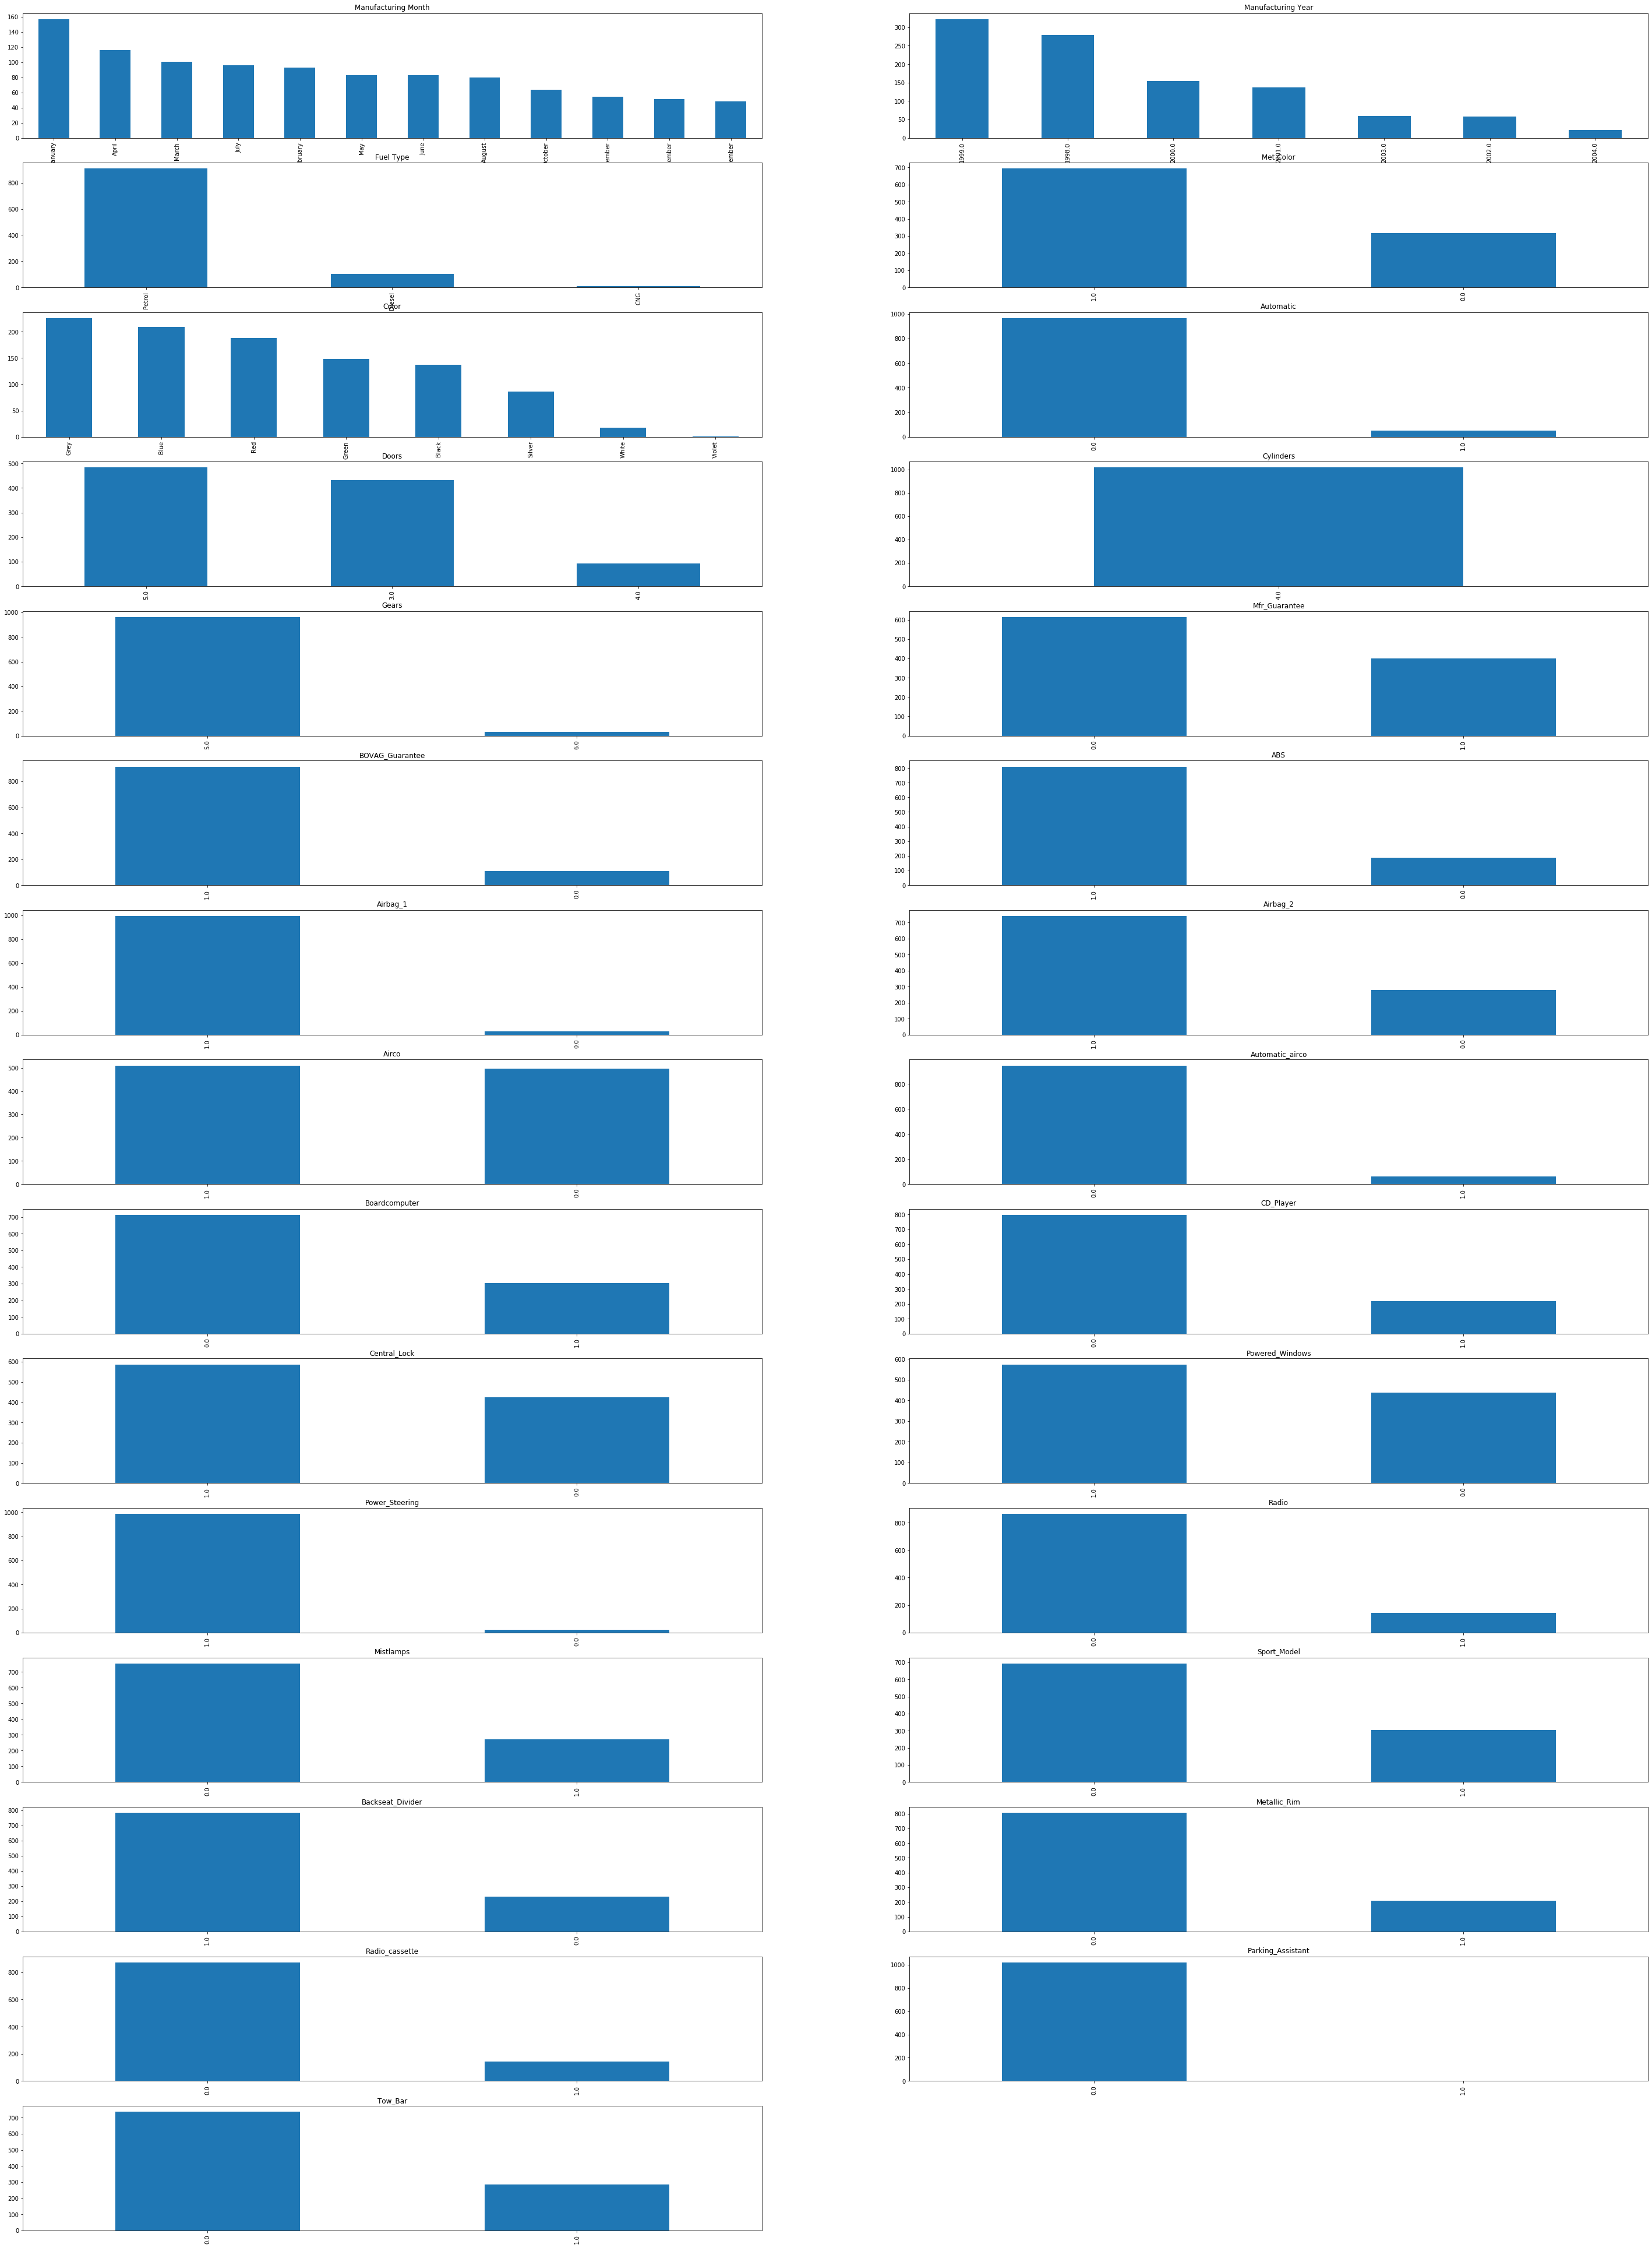

In [21]:
# Set up a grid of plots
plt.figure(figsize=(50,70)) 
fig_dims = (15 , 2)

#Plot Manufacturing Month Bar Graph
plt.subplot2grid(fig_dims, (0, 0))
train_X['Mfg_Month'].value_counts().plot(kind='bar', title='Manufacturing Month')

# Plot Manufacturing Year Bar Graph
plt.subplot2grid(fig_dims, (0, 1))
train_X['Mfg_Year'].value_counts().plot(kind='bar', title='Manufacturing Year')

# Plot Fuel Type Bar Graph
plt.subplot2grid(fig_dims, (1, 0))
train_X['Fuel_Type'].value_counts().plot(kind='bar', title='Fuel Type')

# Plot Met Color Bar Graph
plt.subplot2grid(fig_dims, (1, 1))
train_X['Met_Color'].value_counts().plot(kind='bar', title='Met Color')

# Plot Color Bar Graph
plt.subplot2grid(fig_dims, (2, 0))
train_X['Color'].value_counts().plot(kind='bar', title='Color')

# Plot Automatic Bar Graph
plt.subplot2grid(fig_dims, (2, 1))
train_X['Automatic'].value_counts().plot(kind='bar', title='Automatic')

# Plot Doors Bar Graph
plt.subplot2grid(fig_dims, (3, 0))
train_X['Doors'].value_counts().plot(kind='bar', title='Doors')

# Plot Cylinders Bar Graph
plt.subplot2grid(fig_dims, (3, 1))
train_X['Cylinders'].value_counts().plot(kind='bar', title='Cylinders')

# Plot Gears Bar Graph
plt.subplot2grid(fig_dims, (4, 0))
train_X['Gears'].value_counts().plot(kind='bar', title='Gears')

# Plot Mfr_Guarantee Bar Graph
plt.subplot2grid(fig_dims, (4, 1))
train_X['Mfr_Guarantee'].value_counts().plot(kind='bar', title='Mfr_Guarantee')

# Plot BOVAG_Guarantee Bar Graph
plt.subplot2grid(fig_dims, (5, 0))
train_X['BOVAG_Guarantee'].value_counts().plot(kind='bar', title='BOVAG_Guarantee')

# Plot ABS Bar Graph
plt.subplot2grid(fig_dims, (5, 1))
train_X['ABS'].value_counts().plot(kind='bar', title='ABS')

# Plot Airbag_1 Bar Graph
plt.subplot2grid(fig_dims, (6, 0))
train_X['Airbag_1'].value_counts().plot(kind='bar', title='Airbag_1')

# Plot Airbag_2 Bar Graph
plt.subplot2grid(fig_dims, (6, 1))
train_X['Airbag_2'].value_counts().plot(kind='bar', title='Airbag_2')

# Plot Airco Bar Graph
plt.subplot2grid(fig_dims, (7, 0))
train_X['Airco'].value_counts().plot(kind='bar', title='Airco')

# Plot Automatic_airco Bar Graph
plt.subplot2grid(fig_dims, (7, 1))
train_X['Automatic_airco'].value_counts().plot(kind='bar', title='Automatic_airco')

# Plot Boardcomputer Bar Graph
plt.subplot2grid(fig_dims, (8, 0))
train_X['Boardcomputer'].value_counts().plot(kind='bar', title='Boardcomputer')

# Plot CD_Player Bar Graph
plt.subplot2grid(fig_dims, (8, 1))
train_X['CD_Player'].value_counts().plot(kind='bar', title='CD_Player')

# Plot Central_Lock Bar Graph
plt.subplot2grid(fig_dims, (9, 0))
train_X['Central_Lock'].value_counts().plot(kind='bar', title='Central_Lock')

# Plot Powered_Windows Bar Graph
plt.subplot2grid(fig_dims, (9, 1))
train_X['Powered_Windows'].value_counts().plot(kind='bar', title='Powered_Windows')

# Plot Power_Steering Bar Graph
plt.subplot2grid(fig_dims, (10, 0))
train_X['Power_Steering'].value_counts().plot(kind='bar', title='Power_Steering')

# Plot Radio Bar Graph
plt.subplot2grid(fig_dims, (10, 1))
train_X['Radio'].value_counts().plot(kind='bar', title='Radio')

# Plot Mistlamps Bar Graph
plt.subplot2grid(fig_dims, (11, 0))
train_X['Mistlamps'].value_counts().plot(kind='bar', title='Mistlamps')

# Plot Sport_Model Bar Graph
plt.subplot2grid(fig_dims, (11, 1))
train_X['Sport_Model'].value_counts().plot(kind='bar', title='Sport_Model')

# Plot Backseat_Divider Bar Graph
plt.subplot2grid(fig_dims, (12, 0))
train_X['Backseat_Divider'].value_counts().plot(kind='bar', title='Backseat_Divider')

# Plot Metallic_Rim Bar Graph
plt.subplot2grid(fig_dims, (12, 1))
train_X['Metallic_Rim'].value_counts().plot(kind='bar', title='Metallic_Rim')

# Plot Radio_cassette Bar Graph
plt.subplot2grid(fig_dims, (13, 0))
train_X['Radio_cassette'].value_counts().plot(kind='bar', title='Radio_cassette')

# Plot Parking_Assistant Bar Graph
plt.subplot2grid(fig_dims, (13, 1))
train_X['Parking_Assistant'].value_counts().plot(kind='bar', title='Parking_Assistant')

# Plot Boardcomputer Bar Graph
plt.subplot2grid(fig_dims, (14, 0))
train_X['Tow_Bar'].value_counts().plot(kind='bar', title='Tow_Bar')




#### d) Analysis and Understanding of the Dataset For Discrete/Binary Variables:
For Discrete and Binary variables we will primarily impute missing values with the values which have the highest frequency of occurance. Lets check through each of the variables to see how we are going to impute them

1. **Manufacturing Month**: January shows the peak frequency in comparison to others so missing values will be imputed with January as a value
2. **Manufacturing Year**: Majority of the models are from the year 1999 so missing values will be imputed with 1999 as a value.
3. **Fuel Type**: We can clearly see the dominant value is Petrol so we are going to impute the missing values with Petrol as a value.
4. **Met color**: It has more occurances of 1 as the dominant value than 0 hence the missing values will be imputed with 1 as a value.
5. **Color**: Since Red, Green and Blue almost show the maximum frequency distribution, we will diving the number of appearances of NaN values to 3 and assign them Red, Green and Blue missing values.
6. **Automatic**: Majority values are 0 so the missing values will be imputed as 0
7. **Doors**: The Majority values are 5 for the doors so the missing values will be imputed with 5 as the value.
8. **Cylinders**: It has only one value so will contain 4 as the value for missing values.
9. **Gears**: Majority are 5 gears, so the missing values will be imputed with 5 as the value.
10. **Mfr_Guarantee**: 0 values are higher than 1 so the missing values will be imputed with 0 as the value.
11. **BOVAG_Guarantee**: 1 values are higher than 0 so the missing values will be imputed with 1 as the value.
12. **ABS**:  1 values are higher than 0 so the missing values will be imputed with 1 as the value.
12. **Airbag_1**:  1 values are higher than 0 so the missing values will be imputed with 1 as the value.
14. **Airbag_2**:  1 values are higher than 0 so the missing values will be imputed with 1 as the value.
15. **Airco**: 1 values are higher than 0 so the missing values will be imputed with 1 as the value.
16. **Automatic_airco**:  0 values are higher than 1 so the missing values will be imputed with 0 as the value.
17. **Boardcomputer**:  0 values are higher than 1 so the missing values will be imputed with 0 as the value.
18. **CD_Player**:  0 values are higher than 1 so the missing values will be imputed with 0 as the value.
19. **Central_Lock**: 1 values are higher than 0 so the missing values will be imputed with 1 as the value.
20. **Powered_Windows**: 1 values are higher than 0 so the missing values will be imputed with 1 as the value.
21. **Power_Steering**: 1 values are higher than 0 so the missing values will be imputed with 1 as the value.
22. **Radio**:  0 values are higher than 1 so the missing values will be imputed with 0 as the value.
23. **Mistlamps**:  0 values are higher than 1 so the missing values will be imputed with 0 as the value.
24. **Sport_Model**:  0 values are higher than 1 so the missing values will be imputed with 0 as the value.
25. **Backseat_Divider**: 1 values are higher than 0 so the missing values will be imputed with 1 as the value.
26. **Metallic_Rim**: 0 values are higher than 1 so the missing values will be imputed with 0 as the value.
27. **Radio_cassette**: 0 values are higher than 1 so the missing values will be imputed with 0 as the value.
28. **Parking_Assistant**: 0 values are higher than 1 so the missing values will be imputed with 0 as the value.
29. **Tow_Bar**: 0 values are higher than 1 so the missing values will be imputed with 0 as the value.


### 11) Imputing the missing values:
### For Train Dataset: 
#### a) Imputing the Continous variables with missing values
Let's pick each of the 6 variables and impute the missing values within them as we decided based on the analysis we did above in step 10.a). We will be imputing Age, KM, CC,HP, Quarterly_Tax, Weight and Guarantee Period with Median values.

In [22]:
# median imputation: Features: Age, KM, HP, Quarterly_Tax, and Weight
median_variables = ['Age_08_04', 'KM', 'HP', 'CC', 'Quarterly_Tax', 'Weight', 'Guarantee_Period']
for z in median_variables:
    train_X[z]= train_X[z].fillna(train_X[z].median())
    train_X[z] = train_X[z].astype(int)    
    

In [24]:
#Checking if the 6 continous variables are now having any missing values or not
#train_X.isnull().any()
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1068 entries, 1297 to 684
Data columns (total 36 columns):
Age_08_04            1068 non-null int32
Mfg_Month            1026 non-null object
Mfg_Year             1030 non-null float64
KM                   1068 non-null int32
Fuel_Type            1024 non-null object
HP                   1068 non-null int32
Met_Color            1010 non-null float64
Color                1012 non-null object
Automatic            1015 non-null float64
CC                   1068 non-null int32
Doors                1006 non-null float64
Cylinders            1015 non-null float64
Gears                994 non-null float64
Quarterly_Tax        1068 non-null int32
Weight               1068 non-null int32
Mfr_Guarantee        1014 non-null float64
BOVAG_Guarantee      1021 non-null float64
Guarantee_Period     1068 non-null int32
ABS                  996 non-null float64
Airbag_1             1020 non-null float64
Airbag_2             1020 non-null float64
Airco  

#### b) Imputing the Discrete/Binary variables with missing values
Let's pick the rest of the 29 catagorical variables and impute the missing values within them as we decided based on the analysis we did above in step 10.d). We will be imputing each of these variables missing values with the values which have the maximum occurances. To do so we will be performing modal imputation.

In [25]:
# modal imputation: Features: Manufacturing Month, Manufacturing Year, Fuel Type, MetColor, Color, Doors,etc 

column_names = ['Mfg_Month','Mfg_Year', 'Fuel_Type','Met_Color', 'Color', 'Automatic','Doors', 'Cylinders', 'Gears',
          'Mfr_Guarantee','BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco',
          'Boardcomputer' , 'CD_Player' , 'Central_Lock' , 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps' ,
          'Sport_Model' , 'Backseat_Divider' , 'Metallic_Rim' , 'Radio_cassette' , 'Parking_Assistant', 'Tow_Bar']
for z in column_names:
    mode_count = train_X[z].value_counts().index[0]
    train_X[z].fillna(mode_count, inplace=True)


In [26]:
### Checking for null values presence:
#train_X.isnull().any()
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1068 entries, 1297 to 684
Data columns (total 36 columns):
Age_08_04            1068 non-null int32
Mfg_Month            1068 non-null object
Mfg_Year             1068 non-null float64
KM                   1068 non-null int32
Fuel_Type            1068 non-null object
HP                   1068 non-null int32
Met_Color            1068 non-null float64
Color                1068 non-null object
Automatic            1068 non-null float64
CC                   1068 non-null int32
Doors                1068 non-null float64
Cylinders            1068 non-null float64
Gears                1068 non-null float64
Quarterly_Tax        1068 non-null int32
Weight               1068 non-null int32
Mfr_Guarantee        1068 non-null float64
BOVAG_Guarantee      1068 non-null float64
Guarantee_Period     1068 non-null int32
ABS                  1068 non-null float64
Airbag_1             1068 non-null float64
Airbag_2             1068 non-null float64
Airco

In [27]:
train_X.describe()

,Age_08_04,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,Cylinders,Gears,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.0,1068.000000,...,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,56.219101,1999.622659,67862.489700,102.229401,0.703184,0.045880,1565.532772,4.106742,4.0,5.030899,...,0.589888,0.979401,0.135768,0.254682,0.286517,0.784644,0.195693,0.133895,0.002809,0.265918
std,18.385814,1.550443,36214.829909,13.667041,0.457069,0.209323,181.818482,0.950426,0.0,0.173125,...,0.492084,0.142105,0.342702,0.435886,0.452346,0.411262,0.396919,0.340699,0.052950,0.442028
min,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,3.000000,4.0,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,1998.000000,43629.500000,97.000000,0.000000,0.000000,1400.000000,3.000000,4.0,5.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,61.000000,1999.000000,64000.000000,110.000000,1.000000,0.000000,1600.000000,5.000000,4.0,5.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,69.000000,2001.000000,86027.250000,110.000000,1.000000,0.000000,1600.000000,5.000000,4.0,5.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,80.000000,2004.000000,232940.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,4.0,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### For Test Dataset: 
#### a) Imputing the Continous & Discrete/Binary variables with missing values
Just like we did above we will do the same steps on the test data as well.

In [28]:
# median imputation: Features: Age, KM, HP, Quarterly_Tax, Weight, and Guarantee Period.
median_variables = ['Age_08_04','KM','CC','HP', 'Quarterly_Tax', 'Weight', 'Guarantee_Period']
for z in median_variables:
    test_X[z]= test_X[z].fillna(test_X[z].median())
    test_X[z] = test_X[z].astype(int)
    
# mode imputation: Features: Manufacturing Month, Manufacturing Year, Fuel Type, MetColor, Color, Doors,etc 

column_names = ['Mfg_Month','Mfg_Year', 'Fuel_Type','Met_Color', 'Color', 'Automatic','Doors', 'Cylinders', 'Gears',
          'Mfr_Guarantee','BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco',
          'Boardcomputer' , 'CD_Player' , 'Central_Lock' , 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps' ,
          'Sport_Model' , 'Backseat_Divider' , 'Metallic_Rim' , 'Radio_cassette' , 'Parking_Assistant', 'Tow_Bar']
for z in column_names:
    mode_count = test_X[z].value_counts().index[0]
    test_X[z].fillna(mode_count, inplace=True)


In [29]:
### Checking for null values presence:
#test_X.isnull().any()
test_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 740 to 412
Data columns (total 36 columns):
Age_08_04            357 non-null int32
Mfg_Month            357 non-null object
Mfg_Year             357 non-null float64
KM                   357 non-null int32
Fuel_Type            357 non-null object
HP                   357 non-null int32
Met_Color            357 non-null float64
Color                357 non-null object
Automatic            357 non-null float64
CC                   357 non-null int32
Doors                357 non-null float64
Cylinders            357 non-null float64
Gears                357 non-null float64
Quarterly_Tax        357 non-null int32
Weight               357 non-null int32
Mfr_Guarantee        357 non-null float64
BOVAG_Guarantee      357 non-null float64
Guarantee_Period     357 non-null int32
ABS                  357 non-null float64
Airbag_1             357 non-null float64
Airbag_2             357 non-null float64
Airco                357 non

In [30]:
#Check if there are null values or not.
test_X.columns[test_X.isnull().any()]

Index([], dtype='object')

In [31]:
test_X.describe()

,Age_08_04,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,Cylinders,Gears,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.0,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,56.210084,1999.563025,71095.801120,101.974790,0.658263,0.070028,1611.142857,4.039216,4.0,5.022409,...,0.571429,0.980392,0.131653,0.224090,0.268908,0.789916,0.201681,0.128852,0.002801,0.260504
std,17.461293,1.410068,38389.738706,16.826341,0.474957,0.255552,786.745315,0.950238,0.0,0.148217,...,0.495566,0.138843,0.338587,0.417567,0.444014,0.407940,0.401818,0.335506,0.052926,0.439526
min,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,3.000000,4.0,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,1998.000000,46500.000000,86.000000,0.000000,0.000000,1400.000000,3.000000,4.0,5.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,59.000000,1999.000000,63328.000000,110.000000,1.000000,0.000000,1600.000000,4.000000,4.0,5.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,71.000000,2000.000000,85000.000000,110.000000,1.000000,0.000000,1600.000000,5.000000,4.0,5.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,80.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.000000,5.000000,4.0,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 12) Data Transformation of the Train and Test Datasets:
We have now completely removed all the null values and imputed them with the desired values. Now we can work on tranforming the data to make it suitable for regression models.

#### a) Data Transformation of Train Dataset 
Let us go through each categorical/ordinal/binary columns and perform data transformation by either mapping or one hot vector encoding. Columns 'Age', 'KM', 'HP', 'CC', 'Quarterly_Tax', 'Weight' and 'Guarantee Period' are continous and will not require 1 hot vector transformation. Column 'Cylinders' has only one value 4 hence we will drop this column. Rest all the 30 columns will require one hot vector transformation as they are all nominal catagorical variables.

In [32]:
#Dropping the Cylinders variable from the Train dataset
train_X.drop(columns = ['Cylinders'], axis = 1, inplace = True)
train_X

#Adding 1 hot vectors to the rest 29 feature columns:
column_names = ['Mfg_Month','Mfg_Year', 'Fuel_Type','Met_Color', 'Color', 'Automatic','Doors', 'Gears',
          'Mfr_Guarantee','BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco',
          'Boardcomputer' , 'CD_Player' , 'Central_Lock' , 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps' ,
          'Sport_Model' , 'Backseat_Divider' , 'Metallic_Rim' , 'Radio_cassette' , 'Parking_Assistant', 'Tow_Bar']
for z in column_names:
    cols = pd.get_dummies(train_X[z], prefix= z)
    train_X[cols.columns] = cols
    train_X.drop(z, axis = 1, inplace = True)


In [33]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1068 entries, 1297 to 684
Data columns (total 86 columns):
Age_08_04                1068 non-null int32
KM                       1068 non-null int32
HP                       1068 non-null int32
CC                       1068 non-null int32
Quarterly_Tax            1068 non-null int32
Weight                   1068 non-null int32
Guarantee_Period         1068 non-null int32
Mfg_Month_April          1068 non-null uint8
Mfg_Month_August         1068 non-null uint8
Mfg_Month_December       1068 non-null uint8
Mfg_Month_February       1068 non-null uint8
Mfg_Month_January        1068 non-null uint8
Mfg_Month_July           1068 non-null uint8
Mfg_Month_June           1068 non-null uint8
Mfg_Month_March          1068 non-null uint8
Mfg_Month_May            1068 non-null uint8
Mfg_Month_November       1068 non-null uint8
Mfg_Month_October        1068 non-null uint8
Mfg_Month_September      1068 non-null uint8
Mfg_Year_1998.0          1068 non-nu

In [34]:
train_X.shape

(1068, 86)

The shape of the Train dataset after transformation is 86 columns and 1068 rows

#### b) Data Transformation of Test Dataset 
Redoing the exact data transformation that we did for the Train Dataset on Test Dataset we should receive the exact number of transformed columns as 86.

In [35]:
#Dropping the Cylinder variable from the Test dataset
test_X.drop(columns = ['Cylinders'], axis = 1, inplace = True)
test_X

#Adding 1 hot vectors to the rest 29 feature columns:
column_names = ['Mfg_Month','Mfg_Year', 'Fuel_Type','Met_Color', 'Color', 'Automatic','Doors', 'Gears',
          'Mfr_Guarantee','BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco',
          'Boardcomputer' , 'CD_Player' , 'Central_Lock' , 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps' ,
          'Sport_Model' , 'Backseat_Divider' , 'Metallic_Rim' , 'Radio_cassette' , 'Parking_Assistant', 'Tow_Bar']
for z in column_names:
    cols = pd.get_dummies(test_X[z], prefix= z)
    test_X[cols.columns] = cols
    test_X.drop(z, axis = 1, inplace = True)


In [36]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 740 to 412
Data columns (total 86 columns):
Age_08_04                357 non-null int32
KM                       357 non-null int32
HP                       357 non-null int32
CC                       357 non-null int32
Quarterly_Tax            357 non-null int32
Weight                   357 non-null int32
Guarantee_Period         357 non-null int32
Mfg_Month_April          357 non-null uint8
Mfg_Month_August         357 non-null uint8
Mfg_Month_December       357 non-null uint8
Mfg_Month_February       357 non-null uint8
Mfg_Month_January        357 non-null uint8
Mfg_Month_July           357 non-null uint8
Mfg_Month_June           357 non-null uint8
Mfg_Month_March          357 non-null uint8
Mfg_Month_May            357 non-null uint8
Mfg_Month_November       357 non-null uint8
Mfg_Month_October        357 non-null uint8
Mfg_Month_September      357 non-null uint8
Mfg_Year_1998.0          357 non-null uint8
Mfg_Year_1999

In [37]:
test_X.shape

(357, 86)

The shape of the Test dataset after transformation is 86 columns and 357 rows

In [39]:
test_X.head()

,Age_08_04,KM,HP,CC,Quarterly_Tax,Weight,Guarantee_Period,Mfg_Month_April,Mfg_Month_August,Mfg_Month_December,...,Backseat_Divider_0.0,Backseat_Divider_1.0,Metallic_Rim_0.0,Metallic_Rim_1.0,Radio_cassette_0.0,Radio_cassette_1.0,Parking_Assistant_0.0,Parking_Assistant_1.0,Tow_Bar_0.0,Tow_Bar_1.0
740,65,82000,86,1300,69,1015,3,1,0,0,...,0,1,1,0,1,0,1,0,0,1
644,68,117000,72,2000,185,1115,3,0,0,0,...,0,1,1,0,1,0,1,0,1,0
434,48,78600,110,1600,85,1075,3,0,0,0,...,0,1,1,0,0,1,1,0,1,0
858,60,64383,86,1300,69,1067,3,0,0,0,...,0,1,1,0,1,0,1,0,1,0
141,19,21684,192,1800,19,1185,12,0,0,0,...,1,0,0,1,0,1,1,0,1,0


#### We have imputed the missing values as well as performed data transformation. Thus, our train and test data sets are completely clean. Now, the next steps will be to perform scaling on the feature set of train and test data.

### 13) Scaling the Feature set in Train and Test Data Sets
In the following regression problem, we have seen considerable outliers which are essential values but at the same time tend to impact the variables in the Data set. We cannot use **Standar Scaler** here because majority of the data is not normally distributed and has extreme outliers. To avoid this we perform MinMaxScaler() to scale the feature set in train and test data, as **MinMaxScaler()** will transform each value in the dataset proportionally thus preserving the shape of the dataset that is not causing any distortion.


In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

In [41]:
train_X_scaled

array([[0.94936709, 0.30067099, 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       [0.50632911, 0.12756559, 0.38211382, ..., 0.        , 0.        ,
        1.        ],
       [0.78481013, 0.49368719, 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.92405063, 0.36113317, 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.58227848, 0.16699222, 0.22764228, ..., 0.        , 1.        ,
        0.        ],
       [0.83544304, 0.42835249, 0.33333333, ..., 0.        , 1.        ,
        0.        ]])

In [42]:
test_X_scaled

array([[0.81012658, 0.3520192 , 0.13821138, ..., 0.        , 0.        ,
        1.        ],
       [0.84810127, 0.50227313, 0.02439024, ..., 0.        , 1.        ,
        0.        ],
       [0.59493671, 0.3374231 , 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.97468354, 0.32335504, 0.13821138, ..., 0.        , 0.        ,
        1.        ],
       [0.89873418, 0.4555141 , 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.6835443 , 0.41741829, 0.33333333, ..., 0.        , 1.        ,
        0.        ]])

In [43]:
# Convert array back to dataframe
from pandas import DataFrame
X_train_scaled = DataFrame(train_X_scaled)

In [44]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 86 columns):
0     1068 non-null float64
1     1068 non-null float64
2     1068 non-null float64
3     1068 non-null float64
4     1068 non-null float64
5     1068 non-null float64
6     1068 non-null float64
7     1068 non-null float64
8     1068 non-null float64
9     1068 non-null float64
10    1068 non-null float64
11    1068 non-null float64
12    1068 non-null float64
13    1068 non-null float64
14    1068 non-null float64
15    1068 non-null float64
16    1068 non-null float64
17    1068 non-null float64
18    1068 non-null float64
19    1068 non-null float64
20    1068 non-null float64
21    1068 non-null float64
22    1068 non-null float64
23    1068 non-null float64
24    1068 non-null float64
25    1068 non-null float64
26    1068 non-null float64
27    1068 non-null float64
28    1068 non-null float64
29    1068 non-null float64
30    1068 non-null float64
31    1068 non-null float

In [45]:
# Convert array back to dataframe
from pandas import DataFrame
X_test_scaled = DataFrame(test_X_scaled)

In [46]:
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 86 columns):
0     357 non-null float64
1     357 non-null float64
2     357 non-null float64
3     357 non-null float64
4     357 non-null float64
5     357 non-null float64
6     357 non-null float64
7     357 non-null float64
8     357 non-null float64
9     357 non-null float64
10    357 non-null float64
11    357 non-null float64
12    357 non-null float64
13    357 non-null float64
14    357 non-null float64
15    357 non-null float64
16    357 non-null float64
17    357 non-null float64
18    357 non-null float64
19    357 non-null float64
20    357 non-null float64
21    357 non-null float64
22    357 non-null float64
23    357 non-null float64
24    357 non-null float64
25    357 non-null float64
26    357 non-null float64
27    357 non-null float64
28    357 non-null float64
29    357 non-null float64
30    357 non-null float64
31    357 non-null float64
32    357 non-null float64
33  

## <font color='blue'> Regression Models
#### We will now start to use our train and test datasets to work on different Regression Models below, before that we import some of the important libraries required for the Regression Models

### 1) K Neighbors Regressor

In [71]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn_neighbours = { 'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}

In [72]:
#Performing Cross validation on the data set.
Grid_KNN = GridSearchCV(KNeighborsRegressor(),knn_neighbours,cv=10,return_train_score=True)
Grid_KNN.fit(X_train_scaled, train_Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [73]:
# Finding out the best parameters for the model

print("Best cross-validation score for the model is: {:.4f}".format(Grid_KNN.best_score_))
print('Best parameters are: ', Grid_KNN.best_params_)
print('Best estimator is: ', Grid_KNN.best_estimator_)

best_cvscore = format(Grid_KNN.best_score_)
best_param = format(Grid_KNN.best_params_)

Best cross-validation score for the model is: 0.8165
Best parameters are:  {'n_neighbors': 6}
Best estimator is:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')


##### Here the best score that we get for Cross validation is 0.8165 with K = 6 

In [74]:
# Reporting the training and testing scores for the best model

print("The train score is: {:.4f} ".format(Grid_KNN.score(X_train_scaled, train_Y)))
print("The test score is: {:.4f} ".format(Grid_KNN.score(X_test_scaled, test_Y)))
train_score = Grid_KNN.score(X_train_scaled, train_Y)
test_score = Grid_KNN.score(X_test_scaled, test_Y)
difference = test_score - train_score

The train score is: 0.8728 
The test score is: 0.7649 


##### The train score is 0.8728 but the test score is 0.7649, the test score is lesser than the train score with a difference of 0.1079

In [75]:
# Capturing the Parameters in a Data Frame:
KNNR_list = [best_cvscore, best_param, train_score, test_score, difference]
KNNR = pd.DataFrame(KNNR_list)
KNNR

,0
0,0.8164776964729986
1,{'n_neighbors': 6}
2,0.872823
3,0.764894
4,-0.107928


Text(0, 0.5, 'Price')

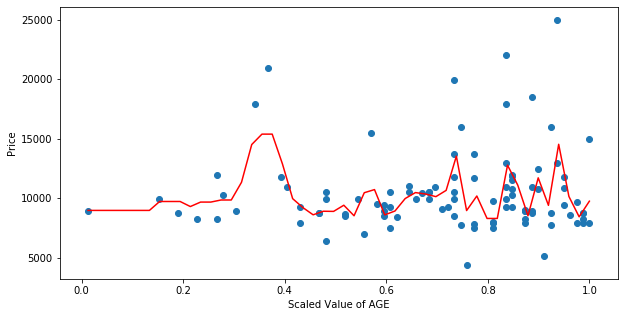

In [76]:
#Age and Price Relationship
X_b = test_X_scaled[:100,0].reshape(-1,1)
y_b = train_Y[:100]

knn_reg = KNeighborsRegressor(4)
knn_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn_reg.predict(X_new)

plt.subplots(figsize = (10,5))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('Scaled Value of AGE')
plt.ylabel('Price')

##### We observe that as the purchase of Toyota Corolla Model cars in the lower range from 5000 to 15000 is highly prevalent in the later stages of life than in the early stages..

### 2) Linear Regression using Normal Equation

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lreg = LinearRegression()
lreg.fit(train_X_scaled, train_Y)
score = cross_val_score(lreg,train_X_scaled, train_Y,cv=10)
print("The Best cross validation score is: {:.4f}".format(score.mean()))
print("{:.4f}".format(lreg.score(train_X_scaled, train_Y)))
print("{:.4f}".format(lreg.score(test_X_scaled, test_Y)))

best_cvscore = format(score.mean())
best_param = 'NA'
train_score = lreg.score(train_X_scaled, train_Y)
test_score = lreg.score(test_X_scaled, test_Y)
difference = test_score - train_score

The Best cross validation score is: -18487356213713772544.0000
0.9140
0.7488


##### The train score is 0.9140 but the test score is 0.7488, the test score is lesser than the train score with a difference of 0.1652

In [79]:
# Capturing the Parameters in a Data Frame:
LRNE_list = [best_cvscore, best_param, train_score, test_score, difference]
LRNE = pd.DataFrame(LRNE_list)
LRNE

,0
0,-1.8487356213713773e+19
1,NA
2,0.913984
3,0.748846
4,-0.165138


Text(0.5, 0, 'Weight Scaled Values')

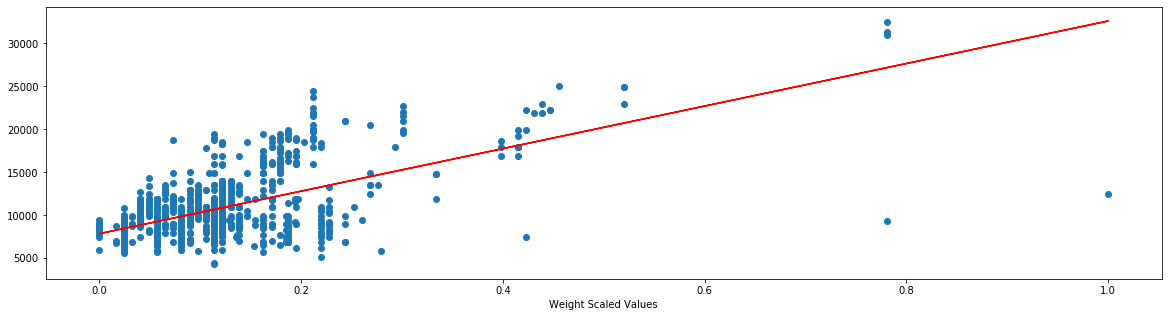

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = train_X_scaled[:,5].reshape(-1,1)
lreg.fit(X_train_rm, train_Y)
y_predict = lreg.predict(X_train_rm)

plt.subplots(figsize = (20,5))
plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,train_Y)
plt.xlabel('Weight Scaled Values')

##### The values of the Weights of the car are around the regressor line with majority values showing cars with lower weights and a  few outlier cars with heavy weight

### 3) Ridge Regression

In [81]:
from sklearn.model_selection import GridSearchCV
from  sklearn.linear_model import Ridge

param_grid = {'alpha':[0.001,0.01, 0.1, 1, 10, 100,1000]}

In [82]:
Grid_Ridge = GridSearchCV(Ridge(),param_grid,cv=10,return_train_score=True)
Grid_Ridge.fit(X_train_scaled,train_Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [83]:
# Finding out the best parameters for the model

print("Best Cross-Validation Score: {:.4f}".format(Grid_Ridge.best_score_))
print('Best Paramater:',Grid_Ridge.best_params_)
best_cvscore = Grid_Ridge.best_score_
best_param = Grid_Ridge.best_params_


Best Cross-Validation Score: 0.8976
Best Paramater: {'alpha': 1}


##### Here we can see that with alpha = 1 the Cross Validation score is 0.8976

In [84]:
# Reporting the training and testing scores for the best model

print("Best Training score: {:.4f}".format(Grid_Ridge.score(X_train_scaled,train_Y)))
print("Best Testing score: {:.4f}".format(Grid_Ridge.score(X_test_scaled, test_Y)))
train_score = Grid_Ridge.score(X_train_scaled,train_Y)
test_score = Grid_Ridge.score(X_test_scaled, test_Y)
difference = test_score - train_score

Best Training score: 0.9134
Best Testing score: 0.8173


##### The train score is 0.9134 but the test score is 0.8173, the test score is comparitively lesser than the train score with a marginal difference of 0.0961

In [85]:
# Capturing the Parameters in a Data Frame:
Ridge_list = [best_cvscore, best_param, train_score, test_score, difference]
Ridge1 = pd.DataFrame(Ridge_list)
Ridge1

,0
0,0.897583
1,{'alpha': 1}
2,0.913375
3,0.817291
4,-0.0960844


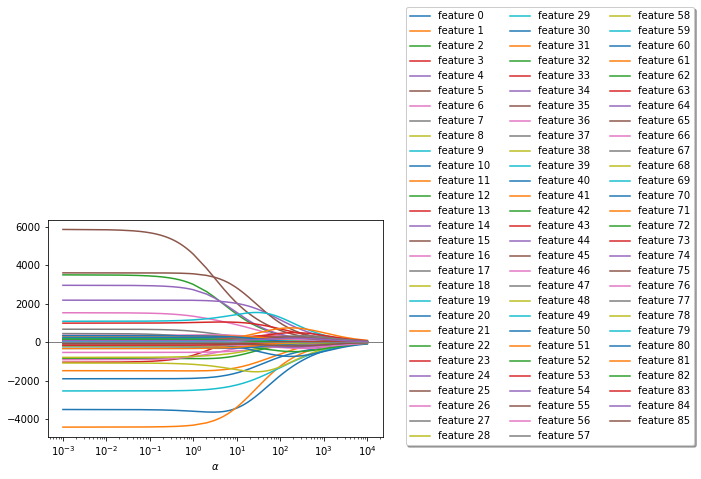

In [139]:
#Plotting the Ridge Regression lines for each of the feature values in the X dataset.
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_scaled,train_Y)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,86):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(1.5, 2),
          ncol=3, fancybox=True, shadow=True)
plt.show()

### 4) LASSO Regression

In [87]:
from sklearn.model_selection import GridSearchCV
from  sklearn.linear_model import Lasso

param_grid = {'alpha':[0.001,0.01, 0.1, 1, 10, 100,1000]}

In [88]:
Grid_Lasso = GridSearchCV(Lasso(),param_grid,cv=10,return_train_score=True)
Grid_Lasso.fit(X_train_scaled,train_Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [89]:
# Finding out the best parameters for the model

print("Best Cross-Validation Score: {:.4f}".format(Grid_Lasso.best_score_))
print('Best Paramater:',Grid_Lasso.best_params_)
best_cvscore = Grid_Lasso.best_score_
best_param = Grid_Lasso.best_params_

Best Cross-Validation Score: 0.8956
Best Paramater: {'alpha': 1}


##### We can see that with alpha = 1 the Cross Validation score is 0.8956

In [90]:
# Reporting the training and testing scores for the best model

print("Best Training score: {:.4f}".format(Grid_Lasso.score(X_train_scaled,train_Y)))
print("Best Testing score: {:.4f}".format(Grid_Lasso.score(X_test_scaled, test_Y)))
train_score = Grid_Lasso.score(X_train_scaled,train_Y)
test_score = Grid_Lasso.score(X_test_scaled, test_Y)
difference = test_score - train_score

Best Training score: 0.9138
Best Testing score: 0.7906


##### The train score is 0.9138 but the test score is 0.7906, the test score is comparitively lesser than the train score with a marginal difference of 0.1232

In [92]:
# Capturing the Parameters in a Data Frame:
Lasso_list = [best_cvscore, best_param, train_score, test_score, difference]
Lasso1 = pd.DataFrame(Lasso_list)
Lasso1

,0
0,0.895634
1,{'alpha': 1}
2,0.913814
3,0.790644
4,-0.12317


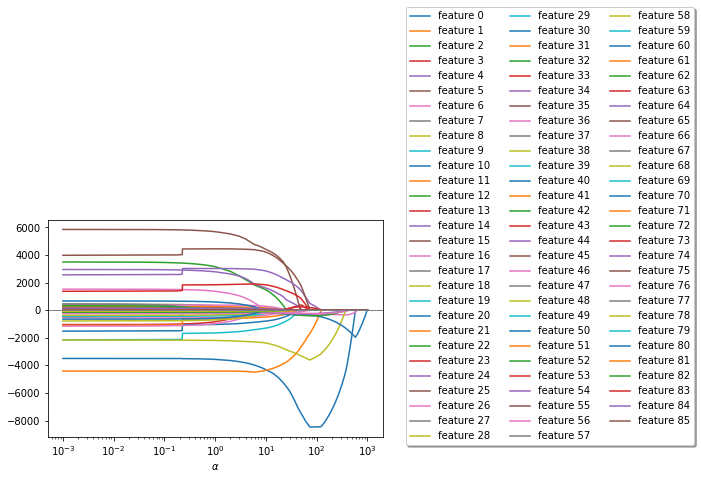

In [140]:
#Plotting the LASSO Regression lines for each of the feature values in the X dataset.
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_scaled,train_Y)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,86):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(1.5, 2),
          ncol=3, fancybox=True, shadow=True)
plt.show()

### 5) Polynomial Regression

In [94]:
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

param_grid = {'polynomialfeatures__degree':[1,2,3]}

In [95]:
pipeline = make_pipeline(PolynomialFeatures(),LinearRegression())

In [96]:
Grid_Poly = GridSearchCV(pipeline,param_grid,cv=10,return_train_score=True)
Grid_Poly.fit(X_train_scaled,train_Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'polynomialfeatures__degree': [1, 2, 3]},
             pre_dispatch='2*n_

In [97]:
# Finding out the best parameters for the model

print("Best Cross-Validation Score: {:.4f}".format(Grid_Poly.best_score_))
print('Best Paramater:',Grid_Poly.best_params_)
best_cvscore = Grid_Poly.best_score_
best_param = Grid_Poly.best_params_

Best Cross-Validation Score: 0.8382
Best Paramater: {'polynomialfeatures__degree': 3}


##### We can see that with the polynomial degree = 3 the Cross Validation score is 0.8382

In [98]:
# Reporting the training and testing scores for the best model

print("Best Training score: {:.4f}".format(Grid_Poly.score(X_train_scaled,train_Y)))
print("Best Testing score: {:.4f}".format(Grid_Poly.score(X_test_scaled,test_Y)))
train_score = Grid_Poly.score(X_train_scaled,train_Y)
test_score = Grid_Poly.score(X_test_scaled,test_Y)
difference = test_score - train_score

Best Training score: 1.0000
Best Testing score: 0.6600


##### The train score is 1 but the test score is 0.6600, the test score is lesser than the train score with a difference of 0.34. The Polynomial Regression is the worst overfitted model for our dataset

In [99]:
# Capturing the Parameters in a Data Frame:
Poly_list = [best_cvscore, best_param, train_score, test_score, difference]
Poly = pd.DataFrame(Poly_list)
Poly

,0
0,0.838184
1,{'polynomialfeatures__degree': 3}
2,1
3,0.660035
4,-0.339965


### 6) Linear SVM Regression

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'tol':[1]}

Grid_LSVC = GridSearchCV(LinearSVR(), param_grid, cv=10, return_train_score=True,scoring='r2')
Grid_LSVC.fit(X_train_scaled,train_Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=1000,
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'tol': [1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

In [101]:
# Finding out the best parameters for the model

print("Best Cross-Validation Score: {:.4f}".format(Grid_LSVC.best_score_))
print('Best Paramater:',Grid_LSVC.best_params_)
best_cvscore = Grid_LSVC.best_score_
best_param = Grid_LSVC.best_params_

Best Cross-Validation Score: 0.7853
Best Paramater: {'C': 100, 'tol': 1}


##### With Parameter C = 100, tol = 1, the Cross-Validation Score is 0.7853

In [102]:
# Reporting the training and testing scores for the best model

print("Best Training score :{:.4f}".format(Grid_LSVC.score(X_train_scaled,train_Y)))
print("Best Testing score: {:.4f}".format(Grid_LSVC.score(X_test_scaled,test_Y)))
train_score = Grid_LSVC.score(X_train_scaled,train_Y)
test_score = Grid_LSVC.score(X_test_scaled,test_Y)
difference = test_score - train_score

Best Training score :0.8388
Best Testing score: 0.7971


##### The train score is 0.8388 and the test score is 0.7971 for the best chosen C Parameter with a marginal difference of 0.0417. The Linear SVM Regression shows substantial underfitting of the dataset. 

In [103]:
# Capturing the Parameters in a Data Frame:
LSVC_list = [best_cvscore, best_param, train_score, test_score, difference]
LSVC = pd.DataFrame(LSVC_list)
LSVC

,0
0,0.785334
1,"{'C': 100, 'tol': 1}"
2,0.83881
3,0.797132
4,-0.041678


### 7) SVM with Linear Kernel

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [107]:
Grid_LK = GridSearchCV(SVR(kernel = 'linear'), param_grid, cv=10, return_train_score=True)
Grid_LK.fit(X_train_scaled,train_Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [108]:
# Finding out the best parameters for the model

print("Best parameters: {}".format(Grid_LK.best_params_))
print("Best cross-validation score: {:.4f}".format(Grid_LK.best_score_))
best_cvscore = Grid_LK.best_score_
best_param = Grid_LK.best_params_

Best parameters: {'C': 100}
Best cross-validation score: 0.8625


##### With Parameter C = 100 the Cross-Validation Score is 0.8625

In [109]:
# Reporting the training and testing scores for the best model

print("Best training score: {:.4f}".format(Grid_LK.score(X_train_scaled,train_Y)))
print("Best testing score: {:.4f}".format(Grid_LK.score(X_test_scaled,test_Y)))
train_score = Grid_LK.score(X_train_scaled,train_Y)
test_score = Grid_LK.score(X_test_scaled,test_Y)
difference = test_score - train_score

Best training score: 0.8743
Best testing score: 0.8346


##### The train score is 0.8743 and the test score is 0.8346 for the best chosen C Parameter with a marginal difference of 0.0397. As compared to the previous models run so far, SVM with Linear Kernal fits the dataset for the regression model pretty well.

In [110]:
# Capturing the Parameters in a Data Frame:
LK_list = [best_cvscore, best_param, train_score, test_score, difference]
LK = pd.DataFrame(LK_list)
LK

,0
0,0.862535
1,{'C': 100}
2,0.874279
3,0.8346
4,-0.0396787


### 8) SVM with Poly Kernel

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [112]:
Grid_PK = GridSearchCV(SVR(kernel = 'poly'), param_grid, cv=10, return_train_score=True)
Grid_PK.fit(X_train_scaled,train_Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [113]:
# Finding out the best parameters for the model

print("Best parameters: {}".format(Grid_PK.best_params_))
print("Best cross-validation score: {:.4f}".format(Grid_PK.best_score_))
best_cvscore = Grid_PK.best_score_
best_param = Grid_PK.best_params_

Best parameters: {'C': 100}
Best cross-validation score: -0.0243


##### With Parameter C = 100 the Cross-Validation Score is -0.0243

In [114]:
# Reporting the training and testing scores for the best model

print("Best training score: {:.4f}".format(Grid_PK.score(X_train_scaled,train_Y)))
print("Best testing score: {:.4f}".format(Grid_PK.score(X_test_scaled,test_Y)))
train_score = Grid_PK.score(X_train_scaled,train_Y)
test_score = Grid_PK.score(X_test_scaled,test_Y)
difference = test_score - train_score

Best training score: -0.0138
Best testing score: 0.0102


##### The train score is -0.0138 and the test score is 0.0102 for the best chosen C Parameter with a marginal difference of 0.024. As compared to the previous models run so far, SVM with Poly Kernal creates the worst underfit for the dataset for the regression models.

In [116]:
# Capturing the Parameters in a Data Frame:
PK_list = [best_cvscore, best_param, train_score, test_score, difference]
PK = pd.DataFrame(PK_list)
PK

,0
0,-0.0242574
1,{'C': 100}
2,-0.0138132
3,0.0102477
4,0.0240609


### 9) SVM with RBF Kernel

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [118]:
Grid_RK = GridSearchCV(SVR(kernel = 'rbf'), param_grid, cv=10, return_train_score=True)
Grid_RK.fit(X_train_scaled,train_Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [119]:
# Finding out the best parameters for the model

print("Best parameters: {}".format(Grid_RK.best_params_))
print("Best cross-validation score: {:.4f}".format(Grid_RK.best_score_))
best_cvscore = Grid_RK.best_score_
best_param = Grid_RK.best_params_

Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: 0.3563


##### With Parameter C = 100 , gamma = 0.1, the Cross-Validation Score is 0.3563

In [120]:
# Reporting the training and testing scores for the best model

print("Best training score: {:.4f}".format(Grid_RK.score(X_train_scaled,train_Y)))
print("Best testing score: {:.4f}".format(Grid_RK.score(X_test_scaled,test_Y)))
train_score = Grid_RK.score(X_train_scaled,train_Y)
test_score = Grid_RK.score(X_test_scaled,test_Y)
difference = test_score - train_score

Best training score: 0.3944
Best testing score: 0.3849


##### The train score is 0.3944 and the test score is 0.3849 for the best chosen C and gamma Parameter with a marginal difference of 0.0095. As compared to the previous models run so far, SVM with RBF Kernal has very less performance difference between the test and the train scores but the score for them are very less in comparison to other models.

In [121]:
# Capturing the Parameters in a Data Frame:
RK_list = [best_cvscore, best_param, train_score, test_score, difference]
RK = pd.DataFrame(RK_list)
RK

,0
0,0.356307
1,"{'C': 100, 'gamma': 0.1}"
2,0.394357
3,0.38487
4,-0.00948747


### 10) Decision Tree Regressor

In [122]:
from sklearn.tree import DecisionTreeRegressor

param_grid = {"max_leaf_nodes": range(2,6),
              "min_samples_split": range(2,10,1),
              "max_depth": [1,2,3,4]
           }

In [123]:
dreg = DecisionTreeRegressor(random_state=0)
Grid_dtree = GridSearchCV(dreg, param_grid, cv=10, return_train_score = True)
Grid_dtree.fit(X_train_scaled,train_Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=0,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4],
                         'max_leaf_nodes': range(2, 6),
                         'min_samples_split': range(2, 10)},
             pre_dispatch='2*n_jobs', refit=T

In [124]:
# Finding out the best parameters for the model

print("Best parameters: {}".format(Grid_dtree.best_params_))
print("Best cross-validation score: {:.4f}".format(Grid_dtree.best_score_))
best_cvscore = Grid_dtree.best_score_
best_param = Grid_dtree.best_params_

Best parameters: {'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_split': 2}
Best cross-validation score: 0.7280


##### With Parameter max_depth = 2, max_leaf_nodes= 4 and min_samples_split = 2, the Cross-Validation Score is 0.7280

In [125]:
# Reporting the training and testing scores for the best model

print("Best training score: {:.4f}".format(Grid_dtree.score(X_train_scaled,train_Y)))
print("Best testing score: {:.4f}".format(Grid_dtree.score(X_test_scaled,test_Y)))
train_score = Grid_dtree.score(X_train_scaled,train_Y)
test_score = Grid_dtree.score(X_test_scaled,test_Y)
difference = test_score - train_score

Best training score: 0.7465
Best testing score: 0.6901


##### The train score is 0.7465 and the test score is 0.6901 for the best chosen depth, leaf nodes and sample splits as mentioned above with a marginal difference of 0.0564. As compared to the previous models run so far, Decision Tree Regressor has comparitively less performance difference between the test and the train scores but the score for them are very less.

In [126]:
# Capturing the Parameters in a Data Frame:
DTree_list = [best_cvscore, best_param, train_score, test_score, difference]
DTree = pd.DataFrame(DTree_list)
DTree

,0
0,0.728002
1,"{'max_depth': 2, 'max_leaf_nodes': 4, 'min_sam..."
2,0.746498
3,0.690054
4,-0.0564438


### 11) SGD Regressor

In [170]:
from sklearn.linear_model import SGDRegressor

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1','l2'],
              'eta0':[0.01,0.05,0.1,0.5]}

In [171]:
Grid_SGD = GridSearchCV(SGDRegressor(max_iter=10000),param_grid,cv=10,return_train_score=True)
Grid_SGD.fit(X_train_scaled,train_Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=10000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'eta0': [0.01, 0.05, 0.1, 0.5],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, ret

In [172]:
# Finding out the best parameters for the model

print("Best parameters: {}".format(Grid_SGD.best_params_))
print("Best cross-validation score: {:.4f}".format(Grid_SGD.best_score_))
best_cvscore = Grid_SGD.best_score_
best_param = Grid_SGD.best_params_

Best parameters: {'alpha': 0.1, 'eta0': 0.05, 'penalty': 'l1'}
Best cross-validation score: 0.8968


##### With Parameter alpha = 0.1, eta0 = 0.05 and penalty = l1, the Cross-Validation Score is 0.8968

In [173]:
# Reporting the training and testing scores for the best model

print("Best training score: {:.4f}".format(Grid_SGD.score(X_train_scaled,train_Y)))
print("Best testing score: {:.4f}".format(Grid_SGD.score(X_test_scaled,test_Y)))
train_score = Grid_SGD.score(X_train_scaled,train_Y)
test_score = Grid_SGD.score(X_test_scaled,test_Y)
difference = test_score - train_score

Best training score: 0.9105
Best testing score: 0.8495


##### The train score is 0.9105 and the test score is 0.8496 for the best chosen alpha, eta0 and penalty values as mentioned above with a marginal difference of 0.061. As compared to the previous models run so far, SGD Regressor has the best performance difference between the test and the train scores as both the train and test scores are higher in comparison to any other models run so far. SGD Regressor is the perfect fit to perform regression for this dataset.

In [174]:
# Capturing the Parameters in a Data Frame:
SGD_list = [best_cvscore, best_param, train_score, test_score, difference]
SGD = pd.DataFrame(SGD_list)
SGD

,0
0,0.896782
1,"{'alpha': 0.1, 'eta0': 0.05, 'penalty': 'l1'}"
2,0.91051
3,0.849503
4,-0.0610068


## <font color='blue'> Conclusion - Regression Models

### 1) Displaying the combined results of all the models

In [175]:
#Combining the Captured Datasets into one DF
Reg = pd.concat([KNNR, LRNE, Ridge1, Lasso1, Poly, LSVC, LK, PK, RK, DTree, SGD], axis = 1)
Reg.columns =['KNNR', 'LRNE', 'Ridge', 'Lasso', 'Poly', 'LSVC', 'LK', 'PK', 'RK', 'DTree', 'SGD'] 
Reg.rows = ['Best CVScore', 'Best Param', 'Train Score', 'Test Score', 'Difference']
Reg

,KNNR,LRNE,Ridge,Lasso,Poly,LSVC,LK,PK,RK,DTree,SGD
0,0.8164776964729986,-1.8487356213713773e+19,0.897583,0.895634,0.838184,0.785334,0.862535,-0.0242574,0.356307,0.728002,0.896782
1,{'n_neighbors': 6},NA,{'alpha': 1},{'alpha': 1},{'polynomialfeatures__degree': 3},"{'C': 100, 'tol': 1}",{'C': 100},{'C': 100},"{'C': 100, 'gamma': 0.1}","{'max_depth': 2, 'max_leaf_nodes': 4, 'min_sam...","{'alpha': 0.1, 'eta0': 0.05, 'penalty': 'l1'}"
2,0.872823,0.913984,0.913375,0.913814,1,0.83881,0.874279,-0.0138132,0.394357,0.746498,0.91051
3,0.764894,0.748846,0.817291,0.790644,0.660035,0.797132,0.8346,0.0102477,0.38487,0.690054,0.849503
4,-0.107928,-0.165138,-0.0960844,-0.12317,-0.339965,-0.041678,-0.0396787,0.0240609,-0.00948747,-0.0564438,-0.0610068


#### As per the table above we can see that the highest Cross Validation Score is 0.8967, highest Train Score is 0.91051 and Test Score is 0.8495 for <mark style="background-color: lightblue">SGD Regressor with Best Parameters as Alpha = 0.1, Eta = 0.05 and penalty =l1</mark>. Hence SGD Regressor is the best fit for the ToyotaCorola Dataset.

### 2) Final Regression using the desired obtained parameters

In [176]:
from sklearn.linear_model import SGDRegressor

final_model = SGDRegressor(max_iter = 10000, alpha = 0.1, eta0 = 0.05, penalty = 'l1')
final_model.fit(X_train_scaled,train_Y)

SGDRegressor(alpha=0.1, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [177]:
print("Best training score: {:.4f}".format(final_model.score(X_train_scaled,train_Y)))
print("Best testing score: {:.4f}".format(final_model.score(X_test_scaled,test_Y)))

Best training score: 0.9077
Best testing score: 0.8577


In [178]:
final_prediction = final_model.predict(X_test_scaled)

In [179]:
final_prediction = np.round(final_prediction,1)
final_prediction

array([ 7876.3,  9347.7, 10678.4,  9124.5, 19503.3,  9488.8, 10612.7,
        8670.4,  8556.9, 12341.5,  9451.2,  9077.5,  9773.6, 17198.8,
        7747.6, 10861.8, 14788.9, 11535.6,  9590.3,  7985.4,  7850.3,
        9197.1,  8246.7,  8370.3,  6836.4, 10126.6, 10043.8, 10696.1,
        9671.5,  8024. , 11557.1, 13244.9, 10854.1,  9076.4,  8598.8,
        8985.3, 10218.3, 10064.3, 20315.2,  5904.5,  8603.4, 22047.6,
        8234. ,  8429.5,  8942.8,  9630. , 11256. ,  7365.5,  6736.1,
        6634.7,  8047.1, 11234.3,  6433.2,  9046.7, 15440.4, 16405.5,
        8482.8, 12445.3,  5580.1, 10650.2, 12887.7,  9097.4,  6625.9,
       10285.1, 11883.7, 11981.6, 11332.2,  7849.7, 12150.3,  8832.9,
       12774.6,  9958. , 12092. ,  8492.4,  7489.4, 12763. ,  8921.1,
       10178.7, 11161.4, 11298.1, 10640.6, 11466.8,  7849.3,  7132. ,
       10145.2,  8229.9, 19212.5, 12676.6, 10918.3, 11027.1, 15499.3,
       12828.6,  9133.2, 13040.9,  9462.5, 10348. , 18807.8, 19352.9,
        8529. ,  941

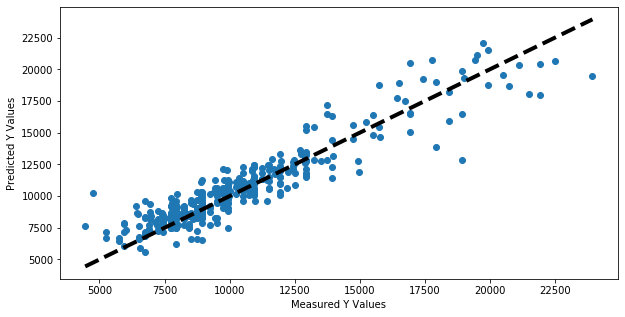

In [180]:
#Plot to show the measured and the predicted values by the SGD Regressor Model
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(test_Y, final_prediction)
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Measured Y Values')
ax.set_ylabel('Predicted Y Values')
plt.show()